In [65]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import seaborn as sns

%matplotlib inline

df = pd.read_csv('drugsComTrain_raw.csv', sep = '\t')

df.loc[df.rating < 5, 'rating'] = int(11)
df.loc[df.rating < 11, 'rating'] = int(12)


df.loc[df.rating == 11, 'rating'] = int(0)
df.loc[df.rating == 12, 'rating'] = int(1)


print(df.shape)
df.head()

(161297, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",1.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",1.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",1.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",1.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",1.0,"November 27, 2016",37


In [66]:
from io import StringIO


df = df[pd.notnull(df['review'])]

df['categ_id_drugName'] = df['drugName'].factorize()[0]
df['categ_id_condition'] = df['condition'].factorize()[0]
df['categ_id_usefulCount'] = df['usefulCount'].factorize()[0]

col = ['categ_id_drugName','categ_id_condition','categ_id_usefulCount','rating']
df = df[col]

df.head(10)

,categ_id_drugName,categ_id_condition,categ_id_usefulCount,rating
0,0,0,0,1.0
1,1,1,1,1.0
2,2,2,2,1.0
3,3,2,3,1.0
4,4,3,4,1.0
5,5,4,5,0.0
6,6,5,6,0.0
7,7,6,7,1.0
8,8,7,8,0.0
9,9,2,9,1.0


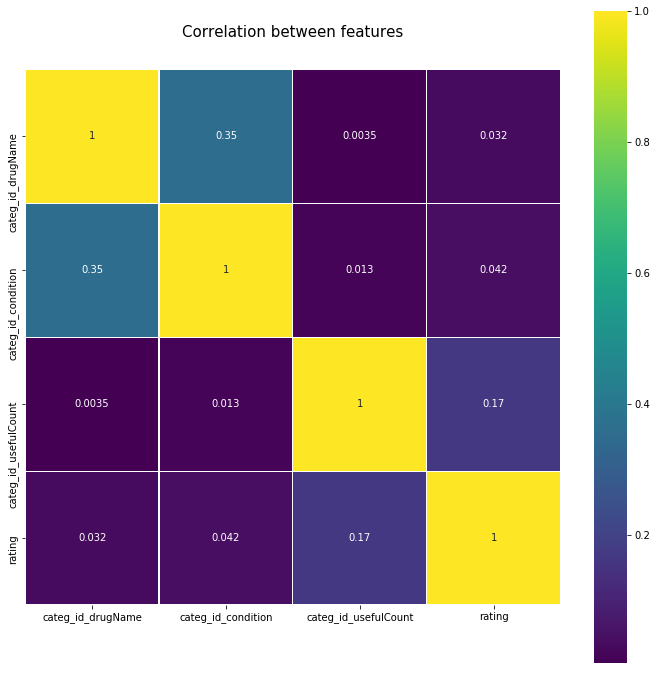

In [67]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between features', y=1.05, size = 15)
sns.heatmap(df.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)